In [1]:
 import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loss function : 평균제곱오차(mean squared error, MSE)
# 값이 클수록 딥러닝 성능의 '나쁨'을 나타낸다.
def mean_squared_error(y, t):
    return 0.5*np.sum((y-t)**2)

In [3]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 2일 확률이 가장 높다고 추정(0.6) -> softmax function의 결과로 확률값
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
# 7일 확률이 가장 높다고 추정(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))    # 답은 2이므로 loss function의 값이 아래가 더 크다.

0.5975

In [5]:
#loss function : 교차 엔트로피 오차(cross entropy error, CEE)
def cross_entropy_error(y, t):
    delta = 1e-7    # log x에서 x == 0일시에 -inf에 수렴하므로 이를 방지하기 위해
    return -np.sum(t*np.log(y + delta)) 

In [6]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 2일 확률이 가장 높다고 추정(0.6) -> softmax function의 결과로 확률값
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [7]:
# 7일 확률이 가장 높다고 추정(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))    # 답은 2이므로 loss function의 값이 아래가 더 크다.

2.302584092994546

In [8]:
import sys, os
os.chdir('/content/drive/My Drive/Colab Notebooks')
from dataset.mnist import load_mnist

In [9]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [10]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)   # 0이상 train_size 미만의 수 중에서 무작위로 batch_size개를 골라낸다.
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [11]:
# batch 용 cross entropy error 
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t* np.log(y + 1e-7)) / batch_size 

# 수치 미분

In [12]:
# 미분 나쁜 구현
def numerical_diff(f, x):
    h = 10e-50 # 너무 작은 값을 사용하여 반올림 오차 발생
    return (f(x+h) - f(x)) / h # 차분 존재(h를 무한히 0으로 좁히는 것이 불가능)

In [13]:
np.float32(1e-50)

0.0

In [14]:
# 미분 좋은 구현
def numerical_diff(f, x):
    h = 1e-4 # 좋은 결과를 얻을 수 있는 충분히 작은 값
    return (f(x+h) - f(x-h)) / (2*h)

In [15]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

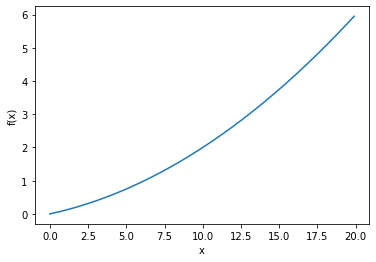

In [16]:
import numpy as np
import matplotlib
x = np.arange(0, 20, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [17]:
numerical_diff(function_1, 5)

0.1999999999990898

In [18]:
numerical_diff(function_1, 10)

0.2999999999986347

In [19]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

0.1999999999990898


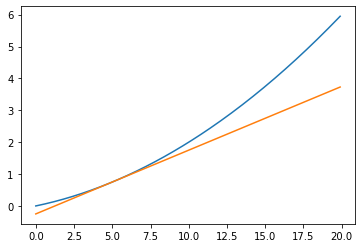

In [20]:
tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

# 편미분

In [21]:
from mpl_toolkits.mplot3d import Axes3D

In [22]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

In [23]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2

In [24]:
numerical_diff(function_tmp1, 3.)

6.00000000000378

In [25]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [26]:
numerical_diff(function_tmp2, 4.)

7.999999999999119

In [27]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

In [28]:
numerical_gradient(function_2, np.array([3., 4.]))

array([6., 8.])

In [29]:
numerical_gradient(function_2, np.array([0., 2.]))

array([0., 4.])

In [30]:
numerical_gradient(function_2, np.array([3., 0.]))

array([6., 0.])

# 경사하강법

In [31]:
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
# f: 최적화 하려는 함수, init_x: 초기값, lr: 학습률(learning rate), step_num: 경사하강법 반복 횟수
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    print('최솟값: ', f(x))   
    return x

In [32]:
def function_2(x):
    return x[0]**2 + x[1]**2 + 1

In [33]:
init_x = np.array([-3., 4.])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

최솟값:  1.0


array([-6.11175111e-10,  8.14789125e-10])

In [34]:
init_x = np.array([-3., 4.])
gradient_descent(function_2, init_x = init_x, lr=10., step_num=100) # 발산

최솟값:  6.724034830146604e+26


array([-2.58983747e+13, -1.29524862e+12])

In [35]:
init_x = np.array([-3., 4.])
gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num=100) # 갱신되지 않음.

최솟값:  25.999998999999928


array([-2.99999994,  3.99999992])

In [36]:
import sys, os
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks


In [37]:
cd deep-learning-from-scratch

/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch


In [38]:
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch


In [39]:
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [40]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [41]:
net = simpleNet()
print(net.W)

[[ 0.34096315  1.20361049 -1.84800594]
 [ 0.17308237  0.93704207 -0.17253007]]


In [42]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.36035202  1.56550416 -1.26408062]


In [43]:
np.argmax(p)    # 최댓값의 index

1

In [44]:
t = np.array([1, 0, 0])     # 정답 레이블 one-hot-encoding
net.loss(x, t)

1.511668099670723

In [45]:
#def f(W):
#    return net.loss(x, t)
f = lambda w : net.loss(x, t)

In [46]:
dW = numerical_gradient(f, net.W)
print(dW)

[[-0.46767478  0.44160366  0.02607112]
 [-0.70151217  0.66240549  0.03910667]]


# 학습 알고리즘 구현하기(MNIST)

In [47]:
import sys, os
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch


In [48]:
from common.functions import *
from common.gradient import numerical_gradient

In [49]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y
    
    # x: 입력 데이터, t: 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(y, axis=1)

        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    # x: 입력 데이터, t: 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [50]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape

(784, 100)

In [51]:
net.params['b1'].shape

(100,)

In [52]:
net.params['W2'].shape

(100, 10)

In [53]:
net.params['b2'].shape

(10,)

In [54]:
x= np.random.rand(100, 784)
y = net.predict(x)

In [55]:
np.argmax(y, axis=1)

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [56]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

In [60]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

# hyperparameter
iters_num = 10000   # 반복횟수
train_size = x_train.shape[0]
batch_size = 100    # 미니 배치 크기
learning_rate = 0.1     # 학습률

In [61]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [ ]:
for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1 epoch 당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))